This is a Python program that locates the pinch point and calculates the heating and cooling duties of an integrated heat exchanger network.

In [2]:
# Defining variables

H1T1, H1T2 = 650,370    #initial and final T of hot stream 1
H1F = 10                #heat capacity of hot stream 1

H2T1, H2T2 = 590,370    #initial and final T of hot stream 2
H2F = 20                #heat capacity of hot stream 1

C1T1, C1T2 = 410,650    #initial and final T of cold stream 1
C1F = 15                #heat capacity of hot stream 1

C2T1, C2T2 = 350,500    #initial and final T of cold stream 2
C2F = 13                #heat capacity of hot stream 1

HRAT = 10               #heat recovery approach temperature

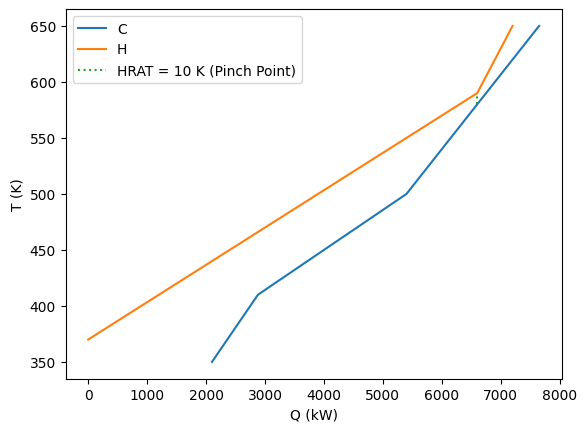

H data points: [(0.0, 370), (6600.0, 590), (7200, 650)]
C data points: [(2100.0, 350), (2880.0, 410), (5400.0, 500), (7650.0, 650)]
Minimum Heating Required = 450.0 kW
Minimum Cooling Required = 2100.0 kW


In [4]:
import numpy as np
import matplotlib.pyplot as plt

H1T1, H1T2 = 650,370
H1F = 10

H2T1, H2T2 = 590,370
H2F = 20

C1T1, C1T2 = 410,650
C1F = 15

C2T1, C2T2 = 350,500
C2F = 13


def getT(xs,ys,x):
    x1,x2 = xs
    y1,y2 = ys
    m = (y2-y1)/(x2-x1)
    c = y1 - m*x1
    y = m*x+c
    return y

def getQ(xs,ys,y):
    x1,x2 = xs
    y1,y2 = ys
    m = (y2-y1)/(x2-x1)
    c = y1 - m*x1
    x = (y-c)/m
    return x


H2T = (H2T1,H2T2)
H2Q = ((H2T1-H2T2)*H2F,0)

H1T = (H1T1,H1T2)
H1Q = ((H1T1-H1T2)*H1F+H2Q[0],H2Q[0])

H1H2T = (max(H1T2,H2T2),min(H1T1,H2T1))
H1H2Q = (getQ(H2Q,H2T,H1H2T[0]),getQ(H1Q,H1T,H1H2T[1]))


C2T = (C2T1,C2T2)
C2Q = (0,(C2T2-C2T1)*C2F)

C1T = (C1T1,C1T2)
C1Q = (C2Q[1],(C1T2-C1T1)*C1F+C2Q[1])


C1C2T = (max(C1T1,C2T1),min(C1T2,C2T2))
C1C2Q = (getQ(C2Q,C2T,C1C2T[0]),getQ(C1Q,C1T,C1C2T[1]))


CQ = [C2Q[0],C1C2Q[0],C1C2Q[1],C1Q[1]]
CT = [C2T[0],C1C2T[0],C1C2T[1],C1T[1]]

HQ = [H1H2Q[0],H1H2Q[1],H1Q[0]]
HT = [H1H2T[0],H1H2T[1],H1T[0]]


m = (CT[3]-CT[2])/(CQ[3]-CQ[2])
shiftC = getQ(H1Q,H1T,HT[1]) - CQ[2] - (HT[1]-HRAT-CT[2])/m

CQshift = [shiftC+q for q in CQ]

plt.plot(CQshift,CT)

plt.plot(HQ,HT)
plt.plot([6600,6600],[580,590],linestyle="dotted")
plt.legend(["C","H","HRAT = 10 K (Pinch Point)"])
plt.xlabel("Q (kW)")
plt.ylabel("T (K)")
plt.show()

Hdata = [(HQ[idx],HT[idx]) for idx in range(len(HQ))]
Cdata = [(CQshift[idx],CT[idx]) for idx in range(len(CQ))]


print(f"H data points: {Hdata}")
print(f"C data points: {Cdata}")
print(f"Minimum Heating Required = {CQshift[-1]-HQ[-1]} kW")
print(f"Minimum Cooling Required = {CQshift[0]-HQ[0]} kW")